# Bank Dataset

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import statsmodels.api as sm

## Loading the data

In [117]:
data_1=pd.read_csv("15451783-Example-bank-data.csv")
data_1.head()

,Unnamed: 0,duration,y
0,0,117,no
1,1,274,yes
2,2,167,no
3,3,686,yes
4,4,157,no


In [118]:
data_1=data_1.drop(["Unnamed: 0"],axis=1)
data_1.head()

,duration,y
0,117,no
1,274,yes
2,167,no
3,686,yes
4,157,no


In [119]:
data_1.describe(include="all")

,duration,y
count,518.000000,518
unique,NaN,2
top,NaN,no
freq,NaN,259
mean,382.177606,NaN
std,344.295990,NaN
min,9.000000,NaN
25%,155.000000,NaN
50%,266.500000,NaN
75%,482.750000,NaN


In [120]:
data_1["y"]=data_1["y"].map({"yes":1,"no":0})

## Plotting the data

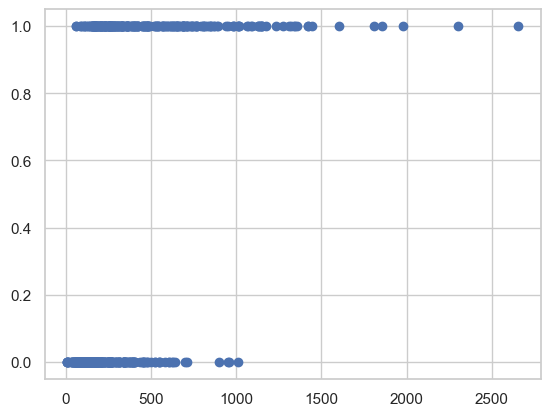

In [121]:
plt.scatter(data_1["duration"],data_1["y"])

## Regression
### Splitting the data

In [122]:
x1=data_1["duration"]
y=data_1["y"]

In [123]:
x=sm.add_constant(x1)
reg_log=sm.Logit(y,x)
result=reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [124]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Thu, 06 Jul 2023   Pseudo R-squ.:                  0.2121
Time:                        17:24:28   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

Text(0, 0.5, 'Yes or No')

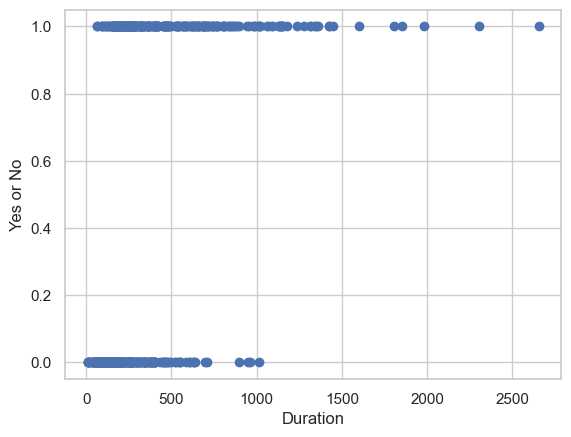

In [125]:
plt.scatter(x1,y)
plt.xlabel("Duration")
plt.ylabel("Yes or No")

In [126]:
result.predict()

array([0.24936904, 0.42571348, 0.30019503, 0.85898342, 0.28956627,
       0.2580803 , 0.21914028, 0.16614452, 0.86976608, 0.31987434,
       0.55276776, 0.22532533, 0.30234734, 0.39480294, 0.35411888,
       0.489064  , 0.29167414, 0.25225084, 0.50567672, 0.82802726,
       0.84413091, 0.5890681 , 0.45848474, 0.40215497, 0.44961416,
       0.20546539, 0.4157464 , 0.42321571, 0.58286683, 0.2580803 ,
       0.17928751, 0.2580803 , 0.85711543, 0.43322907, 0.293791  ,
       0.32658401, 0.98373368, 0.21652721, 0.99665611, 0.62920727,
       0.2639969 , 0.49417474, 0.30885632, 0.27711089, 0.28746746,
       0.2474601 , 0.19643708, 0.30342677, 0.30559213, 0.4712014 ,
       0.87376626, 0.20132396, 0.22177596, 0.28642146, 0.25612742,
       0.49417474, 0.27916371, 0.20214723, 0.88872861, 0.53501481,
       0.23806331, 0.24556099, 0.90211616, 0.40092648, 0.51078751,
       0.45975425, 0.28019361, 0.30450837, 0.87432905, 0.23713725,
       0.18231618, 0.3706541 , 0.4724754 , 0.38144917, 0.54009

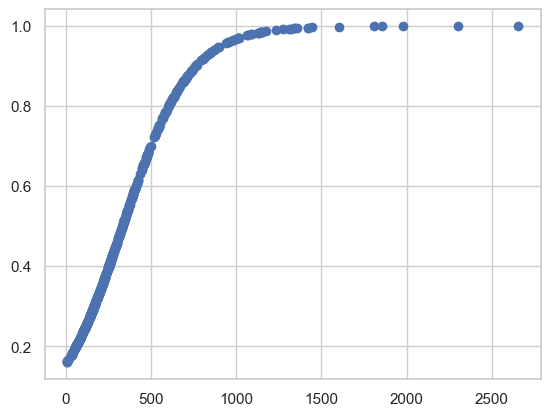

In [127]:
plt.scatter(x1,result.predict())

In [128]:
df=pd.DataFrame(result.pred_table())
df.columns=["Predicted : No","Predicted : Yes"]
df=df.rename(index={0:"Actual No",1:"Actual Yes"})
df

,Predicted : No,Predicted : Yes
Actual No,204.0,55.0
Actual Yes,104.0,155.0


In [129]:
acc=np.array(df)
accuracy=(acc[0,0]+acc[1,1])/acc.sum()
accuracy

0.693050193050193

Our model maybe missing some important factors

## Lets include multiple variables

In [130]:
data_2=pd.read_csv("15451939-Bank-data.csv")
data_2.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [131]:
data_2=data_2.drop(["Unnamed: 0"],axis=1)
data_2["y"]=data_2["y"].map({"yes":1,"no":0})

In [132]:
data_2.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


### Splitting the data

In [133]:
y=data_2["y"]
x1=data_2.drop(["y"],axis=1)

In [134]:
x=sm.add_constant(x1)

## Regression

In [135]:
reg_logit=sm.Logit(y,x)

In [136]:
result_logit=reg_logit.fit()

Optimization terminated successfully.
         Current function value: 0.335942
         Iterations 7


In [137]:
result_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      511
Method:                           MLE   Df Model:                            6
Date:                Thu, 06 Jul 2023   Pseudo R-squ.:                  0.5153
Time:                        17:24:29   Log-Likelihood:                -174.02
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 7.579e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1385      0.339     -0.408      0.683      -0.804       0.527
interest_rate    -0.7802      0.092     -8.471      0.000      -0.961      -0.600
credit            2.4028      1.090      2.205      0.027       0.267       4.538
march            -1.8097      0.332     -5.459      0.000      -2.459      -1.160
may               0.1946      0.229      0.849      0.396      -0.255       0.644
previous          1.2746      0.583      2.186      0.029       0.132       2.417
duration          0.0070      0.001      9.386      0.000       0.006       0.008
=================================================================================
"""

The loglikelihood is better than single variable

In [138]:
def confusion_matrix(data,actual_values,model):
    pred_values=model.predict(data)
    bins=np.array([0,0.5,1])
    cm=np.histogram2d(actual_values,pred_values,bins=bins)[0]
    accuracy=(cm[0,0]+cm[1,1])/cm.sum()
    return cm,accuracy

In [139]:
cm=confusion_matrix(x,y,result_logit)
cm

(array([[220.,  39.],
        [ 31., 228.]]),
 0.8648648648648649)

Our model is 86% accurate

## Now lets use test data

In [140]:
test_data=pd.read_csv("15452035-Bank-data-testing.csv")
test_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0.0,1.0,0.0,0.0,487.0,no
1,1,4.961,0.0,0.0,0.0,0.0,132.0,no
2,2,4.856,0.0,1.0,0.0,0.0,92.0,no
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,yes
4,4,4.963,0.0,0.0,0.0,0.0,36.0,no


In [144]:
test_data.describe()

,interest_rate,credit,march,may,previous,duration,y
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.00000
mean,2.922095,0.031532,0.274775,0.346847,0.099099,398.860360,0.50000
std,1.891766,0.175144,0.447410,0.755950,0.299470,410.565798,0.50113
min,0.639000,0.000000,0.000000,0.000000,0.000000,6.000000,0.00000
25%,1.049250,0.000000,0.000000,0.000000,0.000000,144.750000,0.00000
50%,1.714000,0.000000,0.000000,0.000000,0.000000,255.500000,0.50000
75%,4.960000,0.000000,1.000000,0.000000,0.000000,525.250000,1.00000
max,4.968000,1.000000,1.000000,4.000000,1.000000,3643.000000,1.00000


In [141]:
test_data=test_data.drop(["Unnamed: 0"],axis=1)
test_data["y"]=test_data["y"].map({"yes":1,"no":0})
test_data

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,0.0,36.0,0
...,...,...,...,...,...,...,...
217,4.963,0.0,0.0,0.0,0.0,458.0,1
218,1.264,0.0,1.0,1.0,0.0,397.0,1
219,1.281,0.0,1.0,0.0,0.0,34.0,0
220,0.739,0.0,0.0,2.0,0.0,233.0,0


Split the data

In [142]:
test_y=test_data["y"]
test_x=test_data.drop(["y"],axis=1)
test_x=sm.add_constant(test_x)
test_x

,const,interest_rate,credit,march,may,previous,duration
0,1.0,1.313,0.0,1.0,0.0,0.0,487.0
1,1.0,4.961,0.0,0.0,0.0,0.0,132.0
2,1.0,4.856,0.0,1.0,0.0,0.0,92.0
3,1.0,4.120,0.0,0.0,0.0,0.0,1468.0
4,1.0,4.963,0.0,0.0,0.0,0.0,36.0
...,...,...,...,...,...,...,...
217,1.0,4.963,0.0,0.0,0.0,0.0,458.0
218,1.0,1.264,0.0,1.0,1.0,0.0,397.0
219,1.0,1.281,0.0,1.0,0.0,0.0,34.0
220,1.0,0.739,0.0,0.0,2.0,0.0,233.0


In [143]:
confusion_matrix(test_x,test_y,result_logit)

(array([[94., 17.],
        [12., 99.]]),
 0.8693693693693694)

My model did better in test data